<a href="https://colab.research.google.com/github/pterw/Genomic-Projects/blob/Assignments/Assignment_8_8605690.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Identify yourself here:

Student name: Peter Wiercioch

Student number: 8605690

# BIO3360 Assignment 8#

## Stochastic kinetics and ion channels dynamics  ##

This assignment will allow you to explore the impact on noise and randomness on biological dynamics. The goal is not only to model these systems, but characterize the noisy dynamics they exhibit and try to formulate conclusions about what controls them. We will revisit ion channel kinetics and random walks in two dimensions. 

IMPORTANT REMINDER: Copy-pasting code found online will be considered as plagiarism. And this is easy to verify (trust me!).  

Below is a series of questions that need to be answered. Your "answers" are to be written in the code cells below the question statements. To get points, the output of your code cell must match the expected answer. If you need to anotate your code cell, or make comments use `#` before your comment. The line will be ignored by the compiler, but remain visible. E.g. `#this is a comment`

**Word of caution: Colab's compiler keep track of assignments, even if they are in different code cells. This means that if you make changes to a variable in a cell, it will impact how this variable is used in all other cells. To avoid mixing them up, you can either change your variable names in every code cell, or redefine them at the value you want at the beginning of every new code cell. Note that this hold not only for variables but also functions, libraries etc that were defined in a previous code cell. As mentioned before, that works because all required information is stored in memory. It is critical that you remain aware of the implications of this...especially when you having been working on an assignment, or other code, for a long time!**

First, please write your name and student number in the text cell above.

###Question 1 (5 points)

A simplistic representation of the voltage gated sodium Na+ ion channel found in cellular membranes (e.g. neurons) is a Markov chain model with three different states. These states correspond to molecular configurations of the channel:  inactivated (I), closed (C) or open (O). Let us label these states by 1, 2 and 3, respectively.  
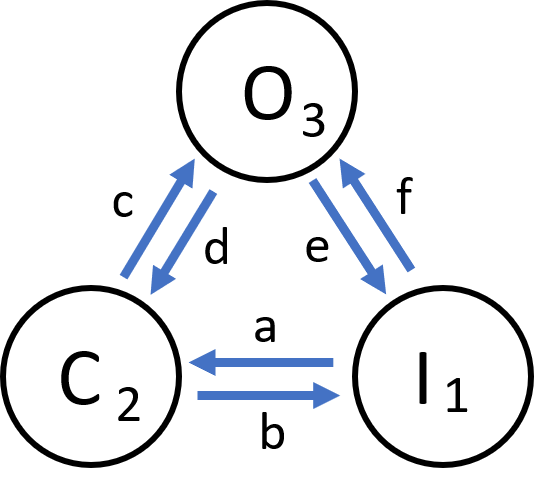

The transition rates or probabilities between the O, C and I states (here labelled $a,b,c,d,e$ and $f$) depend on the membrane polarization: the transmembrane voltage determines how likely it is for the Na+ ion channel to open or close. This is a very important property that plays a central role in the generation of action potentials, and many other cellular processes. 


a) (0.5 point) The transition probabilities $a, b, c, d, e$ and $f$ are functions of the membrane voltage V. They all obey the same base function. Define a function $Boltzmann$ that takes a charge $q$, a basis polarization $V_o$ and and clamp voltage $V_{clamp}$ to provide the transition probability as per the following equation

$
Boltzmann(q,Vo,V_{clamp}) = V_o e^{qV_{clamp}/K}
$

with $K=24.0$. 

b) (0.5 point) For $V_{clamp}=-50$mV, compute the transitions probabilities for the following set of parameters :

$a: V_o=2969, q=0.13$

$b: V_o=704, q=-0.70$

$c: V_o=28932, q=1.25$

$d: V_o=725, q=-0.6$

$e: V_o=1117, q=0.66$

$f: V_o=705, q=-0.49$

c) (0.5 point) Create a multi-dimensional array $P$ (i.e. a 3x3 matrix) whose entries a given by the following transition probabilities 
\begin{pmatrix}
0 & \frac{a}{a+f} & \frac{f}{a+f} \\
\frac{b}{b+c}  & 0 & \frac{c}{b+c} \\
\frac{e}{d+e}  & \frac{d}{d+e} & 0 \\
\end{pmatrix}


d) (0.5 poins) Create an `np.arange` array for time, ranging from 0 to 10ms, with steps of $dt=0.1$. Create an array called `State` to save the values of of the ion channel state with the same size as your time array, initialized with values of 1 (Inactivated). (NOTE: `states=1` means the channel is inactivated, `state=2` means closed, and `state=3` means open)

e) (1 point) We have labelled the different ion channel states (I, C and O) with the values 1,2 and 3 respectively (see diagram above). Based on the example we have seen in the lecture, plot the evolution of the ion channel `state` as a function of time for a clamp voltage $V_{clamp}=-50$mV. (HINT: At every time step, you will need to create multiple `if` statements to see at which state the ion channel is in (1, 2 or 3). Based on the value of the `state` array, generate a uniformly distributed random number between 0 and 1 and see whether the ion channel transits to another state given the probabilities found in the matrix $P$ defined in c)).

f) (1 point) In a different code cell, plot the residence time distribution of the array `state` for $V_{clamp}=-50$mV. Use 3 bins. What do you notice?

g)(1 point) As mentionned before, the transition probabilities change as a function of the membrane voltage. Plot the residence time distribution for the ion channel for $V=-150$mV and $V=-15$mV. What is the difference between $V=-15, -50$ and $-150$ mV? What is the consequence of changing the membrane potential on the ion channel dynamics?


transition probablities are 
a= 2264.585777338696 
b= 3026.3473900419062 
c= 2139.9481126623914 
d= 2530.498644159835 
e= 282.4218285139018 
f= 1956.7322395622373

3x3 matrix
 [[0.         0.53646415 0.46353585]
 [0.58578674 0.         0.41421326]
 [0.10040164 0.89959836 0.        ]]




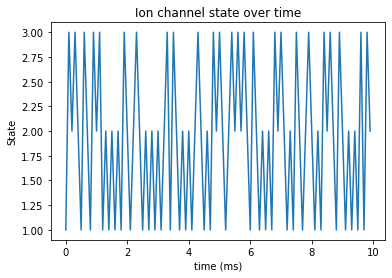

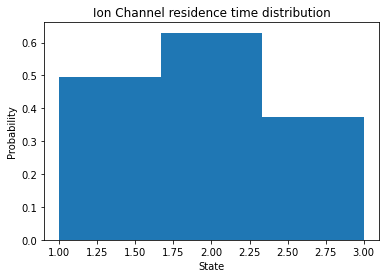

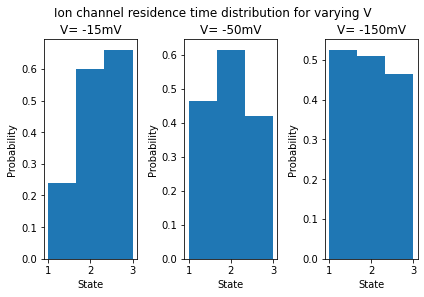

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#a)

def Boltzmann(q,v0,vclamp):
  K=24
  prob = v0*np.exp(q*vclamp/K)
  return prob

#b)

V_clamp = -50

a = Boltzmann(0.13, 2969, V_clamp)
b = Boltzmann(-0.70, 704, V_clamp)
c = Boltzmann(1.25, 28932, V_clamp)
d = Boltzmann(-0.6, 725, V_clamp)
e = Boltzmann(0.66, 1117, V_clamp)
f = Boltzmann(-0.49, 705, V_clamp)

print('transition probablities are','\na=',a,'\nb=',b,'\nc=',c,'\nd=',d,'\ne=',e,'\nf=',f,)

#c)

P=np.array([[0,(a/(a+f)),(f/(a+f))],[(b/(b+c)),0,(c/(b+c))],[(e/(d+e)),(d/(d+e)),0]])
print('\n3x3 matrix\n',P)

#d)

dt=0.1

time=np.arange(0,10,dt)
state=np.ones(len(time))

#e)
for i in range(len(time)-1):
  prob = np.random.rand()
  if state[i] == 1.0: 
    if prob < P[0][1]:
      state[i+1] = 2.0 
    else:
      state[i+1] = 3.0 
  if state[i] == 2.0: 
    if prob < P[1][0]:
      state[i+1] = 1.0 
    else:
      state[i+1] = 3.0 
  if state[i] == 3.0:
    if prob < P[2][0]:
      state[i+1] = 1.0 
    else:
      state[i+1] = 2.0 
print('\n')
plt.plot(time,state)
plt.xlabel('time (ms)')
plt.ylabel('State')
plt.title('Ion channel state over time')
plt.show()

#f)

#The ion channel is most likely to reside in state 2, the closed state, rather than the open or innactivated states.
#It seems equally likely to reside at the open or innactivated states.

numbins = 3
plt.hist(state,numbins,density=1)
plt.title('Ion Channel residence time distribution')
plt.xlabel('State')
plt.ylabel('Probability')
plt.show()

#g)

#The difference between the different voltages (V(mV) = -15,-50,-150)is that it changes the likelihood of the ion channel residing at one particular state depending on V.
#at -15mV, states 2 & 3 are most likely.
#at -50mV, state 2 is most likely. 
#at -150mV, states 1 & 2 are very slightly more favoured than state 3, though there is much more even distribution of residence times between states. State 1 is ever so slightly favoured over 2.

V_clamp = np.array([-15,-50,150])

dt=0.1

time=np.arange(0,10,dt)
state=np.ones(len(time))

V_clamp = [-15, -50, -150]

P=np.array([[0,(a/(a+f)),(f/(a+f))],[(b/(b+c)),0,(c/(b+c))],[(e/(d+e)),(d/(d+e)),0]])

for v in range(len(V_clamp)):
  a = Boltzmann(0.13, 2969, V_clamp[v])
  b = Boltzmann(-0.70, 704, V_clamp[v])
  c = Boltzmann(1.25, 28932, V_clamp[v])
  d = Boltzmann(-0.6, 725, V_clamp[v])
  e = Boltzmann(0.66, 1117, V_clamp[v])
  f = Boltzmann(-0.49, 705, V_clamp[v])
  for i in range(len(time)-1):
    P=np.array([[0,(a/(a+f)),(f/(a+f))],[(b/(b+c)),0,(c/(b+c))],[(e/(d+e)),(d/(d+e)),0]])
    prob = np.random.rand()
    if state[i] == 1.0: 
      if prob < P[0][1]:
        state[i+1] = 2.0 
      else:
        state[i+1] = 3.0 
    if state[i] == 2.0: 
      if prob < P[1][0]:
        state[i+1] = 1.0 
      else:
        state[i+1] = 3.0 
    if state[i] == 3.0: 
      if prob < P[2][0]:
        state[i+1] = 1.0 
      else:
        state[i+1] = 2.0

  numbins = 3
  plt.subplot(1,3,v+1)
  plt.suptitle('Ion channel residence time distribution for varying V',y=1.02)
  plt.hist(state, numbins, density=1)
  plt.xlabel('State')
  plt.ylabel('Probability')
  plt.title('V= '+str(V_clamp[v])+'mV')
  plt.tight_layout()

###Question 2 (5 points)

#Random walk in 2D#

Let us assume we monitor the displacement of micro-organisms on the surface of a fluid, and observe them undergo chemotaxis. This process can be described by  a two-dimensional random walk. In this case, the randomness over a 2-dimensional surface corresponds to a probabilitic "decision" to move to the right or to the left, and up or down, on the surface of the plane. We can use a uniform random number within [0.1] to model this decision, and compare it to the probability of going towards a given direction. 

Here is a summary of this process seen in class:

0. define a starting position on the plane.
1. Roll a dice: Generate a uniform random number within [0,1].
2. If this number is less than the probability of stepping to the right (i.e. positive direction on the x axis) then step to the right, else step to the left (negative direction)
3. Roll a dice (again): Generate a uniform random number within [0,1].
4. If this number is less than the probability of stepping up (i.e. positive direction on the y axis) then step up, else step down (negative direction)
5. Rinse and repeat: go back to step 1 and repeat for every time step.

The process has to be repeated at every time step, and for each microorganism present. We need to define a starting position where the random walks start, as well as the size of the steps made.

a) (0.5 point) Create a `np.arange` array called `Time`, ranging from 0 to 10 seconds by step of $dt=0.1$. Create arrays called `Position_x` and `Position_y` with the same length as `Time`, both assigned with values 0 (this means that the starting position will be $(X,Y)=(0,0)$). These arrays will be used to ttack the positions of the micro-organisms in time. Define the steps `Delta_x` and `Delta_y` representing horizontal and vertical displacements, both with values of 1.0 (here microns).

b) (1 point) Assume that a single microorganism is placed at position $(X,Y)=(0,0)$ at $t=0$. In absence of a given source of nutrients, the process is isotropic - meaning that there no preferred spatial direction direction. The probability of moving right is $P(right) = 0.5$ and the probability of moving up is $P(up)=0.5$. (The probabilities of moving left is then defined by $P(left)= 1-P(right)=0.5$, and $P(down)=1-P(up)=0.5)$.  Using the example seen in class as well as the guidelines above, pot the displacements of the microganism in absence of nutrients: plot `Position_x` versus `Position_y` (not versus `Time`!). 

c) (1 point) Let us now assume that 50 micro-organisms are deposited in the middle of the plane at position $(X,Y)=(0.0)$ at $t=0$. Plot `Position_x` versus `Position_y`for all the microorganisms in a single plot. 

d) (1 point) In presence of nutrients, the random walk may become anisotropic - meaning that there will be a preferred direction. In this case, the probabilities of going right/left and up/down will not be 0.5 (which represents pure chance). Define functions `P_x` and `P_y` that take the position $(X,Y)$ as an input as well as the position of a source of nutrient $(X_n,Y_n)$ and output a probability. These functions are defined by

$
P_x(X,X_n) =\frac{1}{2}(1+tanh(0.05*d_x))
$

$
P_x(Y,Y_n) =\frac{1}{2}(1+tanh(0.05*d_y))
$


with $d_x=(X_n-X)$ and $d_y=(Y_n-Y)$. 

e) (1 point) A nutrient source is placed at position $(X_n,Y_n)=(50,-30)$. Use the functions $P_x$ and $P_y$ developped in d) and plot the chemotaxis  of the 50 micro-organisms. Where do they terminate their movement (approximatively)?

f) (0.5 point) Repeat question e) where now microorganisms are deposited at position $(X,Y)=(150,40)$ at time $t=0$. 


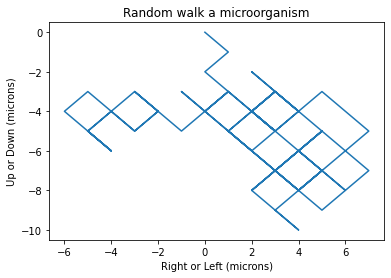

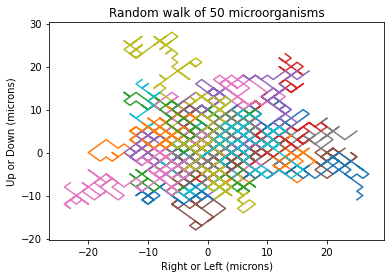

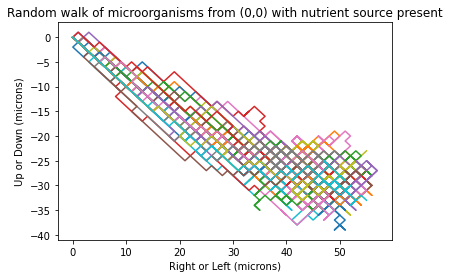

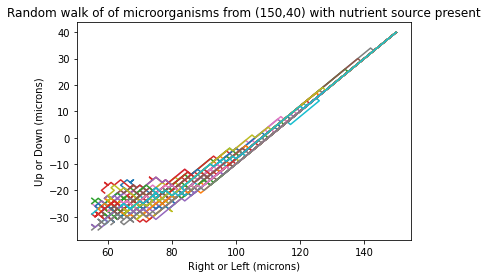

In [ ]:
#a)
import numpy as np
import matplotlib.pyplot as plt

dt=0.1

Time=np.arange(0,10,dt)

Position_x=np.zeros(len(Time))
Position_y=np.zeros(len(Time))

Delta_x = 1.0
Delta_y = 1.0

#b)

prob_x=0.5
prob_y=0.5

Position_x[0] = 0
Position_y[0] = 0

for t in range (len(Time)-1):
  if np.random.rand()<prob_y:
    Position_y[t+1] = Position_y[t]+Delta_y #move up
  else:
    Position_y[t+1] = Position_y[t]-Delta_y #move down
  if np.random.rand()<prob_x:
    Position_x[t+1] = Position_x[t]+Delta_x #move right
  else:
    Position_x[t+1] = Position_x[t]-Delta_x #move down
plt.plot(Position_x,Position_y)
plt.title('Random walk a microorganism')
plt.ylabel('Up or Down (microns)')
plt.xlabel('Right or Left (microns)')
plt.show()

#c)

Position_x[0] = 0
Position_y[0] = 0

walkers = 50
for i in range(walkers):
  for t in range (len(Time)-1):
    if np.random.rand()<prob_y:
      Position_y[t+1] = Position_y[t]+Delta_y #move up
    else:
      Position_y[t+1] = Position_y[t]-Delta_y #move down
    if np.random.rand()<prob_x:
      Position_x[t+1] = Position_x[t]+Delta_x #move right
    else:
      Position_x[t+1] = Position_x[t]-Delta_x #move down
  plt.plot(Position_x,Position_y)
plt.title('Random walk of 50 microorganisms')
plt.ylabel('Up or Down (microns)')
plt.xlabel('Right or Left (microns)')
plt.show()

#d)

def P_x(x,xn):
  px=(0.5)*(1+np.tanh(0.05*(xn-x)))
  return px
def P_y(y,yn):
  py=(0.5)*(1+np.tanh(0.05*(yn-y)))
  return py

#e)  

#They terminate their movement approximately at (50,-30) with some terminating movement past or prior to this point due to random probability.
#This is because the source of the nutrient is at (50,-30) and since the walk is anisotropic they will favour movement towards that point.

Position_x[0] = 0
Position_y[0] = 0

walkers = 50
for i in range(walkers):
  for t in range (len(Time)-1):
    if np.random.rand()<P_y(Position_y[t],-30):
      Position_y[t+1] = Position_y[t]+Delta_y #move up
    else:
      Position_y[t+1] = Position_y[t]-Delta_y #move down
    if np.random.rand()<P_x(Position_x[t],50):
      Position_x[t+1] = Position_x[t]+Delta_x #move right
    else:
      Position_x[t+1] = Position_x[t]-Delta_x #move down
  plt.plot(Position_x,Position_y)
plt.title('Random walk of microorganisms from (0,0) with nutrient source present')
plt.ylabel('Up or Down (microns)')
plt.xlabel('Right or Left (microns)')
plt.show()

#f)  
Position_x[0] = 150
Position_y[0] = 40

walkers = 50
for i in range(walkers):
  for t in range (len(Time)-1):
    if np.random.rand()<P_y(Position_y[t],-30):
      Position_y[t+1] = Position_y[t]+Delta_y #move up
    else:
      Position_y[t+1] = Position_y[t]-Delta_y #move down
    if np.random.rand()<P_x(Position_x[t],50):
      Position_x[t+1] = Position_x[t]+Delta_x #move right
    else:
      Position_x[t+1] = Position_x[t]-Delta_x #move down
  plt.plot(Position_x,Position_y)
plt.title('Random walk of of microorganisms from (150,40) with nutrient source present')
plt.ylabel('Up or Down (microns)')
plt.xlabel('Right or Left (microns)')
plt.show()
